In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm,skew
import numpy as np
import json
import seaborn as sns
import re
from copy import deepcopy
from scipy.special import boxcox1p

In [2]:
data_train = pd.read_csv('train.csv',encoding='ISO-8859-1')
print('number of data train: {}'.format(len(data_train)))
print('keys are : {}'.format(data_train.keys()))
print('Column lengths {}:'.format(len(data_train.keys())))
data_train.head()

number of data train: 34872
keys are : Index(['id', 'sex and age', 'high_BP', 'heart_condition_detected_2017',
       'married', 'job_status and living_area', 'average_blood_sugar', 'BMI',
       'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD',
       'stroke_in_2018'],
      dtype='object')
Column lengths 14:


,id,sex and age,high_BP,heart_condition_detected_2017,married,job_status and living_area,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,stroke_in_2018
0,16053,"F, 61",1,0,1,government?Remote,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN,0
1,1459,"F, 30",0,0,0,Remote?private_sector,107.95,30.4,quit,NaN,NaN,NaN,NaN,0
2,7678,"F, 51",1,0,1,government?Remote,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN,0
3,34943,"F, 54",0,0,1,government?City,113.98,57.3,quit,NaN,NaN,NaN,NaN,0
4,17741,"M, 27",0,0,0,private_sector?City,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN,0


In [194]:
data_train['stroke_in_2018'].isnull().sum()

35

In [3]:
data_test = pd.read_csv('test.csv',encoding='ISO-8859-1')
print('number of data test: {}'.format(len(data_test)))
print('keys are : {}'.format(data_test.keys()))
print('Column lengths {}:'.format(len(data_test.keys())))
data_test.head()

number of data test: 8718
keys are : Index(['id', 'sex and age', 'high_BP', 'heart_condition_detected_2017',
       'married', 'job_status and living_area', 'average_blood_sugar', 'BMI',
       'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC',
       'TreatmentD'],
      dtype='object')
Column lengths 13:


,id,sex and age,high_BP,heart_condition_detected_2017,married,job_status and living_area,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD
0,33327,"F, 36",0.0,0.0,1.0,private_sector?Remote,76.05,33.4,active_smoker,NaN,NaN,NaN,NaN
1,839,"F, 40",0.0,0.0,1.0,City?government,73.77,30.1,non-smoker,NaN,NaN,NaN,NaN
2,11127,"M, 59",0.0,0.0,1.0,business_owner?Remote,62.95,30.8,NaN,NaN,NaN,NaN,NaN
3,20768,"33, F",0.0,0.0,1.0,private_sector?City,68.81,36.5,quit,NaN,NaN,NaN,NaN
4,37774,"F, 22",0.0,0.0,0.0,private_sector?City,122.89,30.8,active_smoker,NaN,NaN,NaN,NaN


In [192]:
len(data_test[data_test['smoker_status'].isnull()])

2697

In [193]:
len(data_train[data_train['smoker_status'].isnull()])

10640

In [4]:
target_train = data_train['stroke_in_2018']
target_train.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke_in_2018, dtype: object

In [5]:
data_train_drop = data_train.drop(['stroke_in_2018'],axis=1)
print('key length {}',len(data_train_drop.keys()))
data_train_drop.head()

key length {} 13


,id,sex and age,high_BP,heart_condition_detected_2017,married,job_status and living_area,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD
0,16053,"F, 61",1,0,1,government?Remote,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN
1,1459,"F, 30",0,0,0,Remote?private_sector,107.95,30.4,quit,NaN,NaN,NaN,NaN
2,7678,"F, 51",1,0,1,government?Remote,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN
3,34943,"F, 54",0,0,1,government?City,113.98,57.3,quit,NaN,NaN,NaN,NaN
4,17741,"M, 27",0,0,0,private_sector?City,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN


In [6]:
data_total = pd.concat((data_train_drop,data_test)).reset_index(drop=True)

In [7]:
print('number of data train: {}'.format(len(data_total)))
print('keys are : {}'.format(data_total.keys()))
print('Column lengths {}:'.format(len(data_total.keys())))
data_total.head()

number of data train: 43590
keys are : Index(['id', 'sex and age', 'high_BP', 'heart_condition_detected_2017',
       'married', 'job_status and living_area', 'average_blood_sugar', 'BMI',
       'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC',
       'TreatmentD'],
      dtype='object')
Column lengths 13:


,id,sex and age,high_BP,heart_condition_detected_2017,married,job_status and living_area,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD
0,16053,"F, 61",1,0,1,government?Remote,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN
1,1459,"F, 30",0,0,0,Remote?private_sector,107.95,30.4,quit,NaN,NaN,NaN,NaN
2,7678,"F, 51",1,0,1,government?Remote,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN
3,34943,"F, 54",0,0,1,government?City,113.98,57.3,quit,NaN,NaN,NaN,NaN
4,17741,"M, 27",0,0,0,private_sector?City,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN


In [8]:
job_status_living = data_total['job_status and living_area']
job_status_living.head()

0        government?Remote
1    Remote?private_sector
2        government?Remote
3          government?City
4      private_sector?City
Name: job_status and living_area, dtype: object

In [9]:
print(job_status_living.dtype)
print(job_status_living[job_status_living.isnull()])

object
2567     NaN
2832     NaN
2948     NaN
2988     NaN
6700     NaN
7371     NaN
7708     NaN
7947     NaN
9086     NaN
9204     NaN
10669    NaN
11687    NaN
11959    NaN
13254    NaN
13893    NaN
14614    NaN
15527    NaN
18343    NaN
20422    NaN
22710    NaN
22777    NaN
25334    NaN
25375    NaN
25643    NaN
25683    NaN
27305    NaN
27331    NaN
27489    NaN
31333    NaN
34056    NaN
34200    NaN
37144    NaN
37172    NaN
37454    NaN
38295    NaN
39529    NaN
40045    NaN
40891    NaN
41638    NaN
41681    NaN
43344    NaN
Name: job_status and living_area, dtype: object


In [10]:
print(job_status_living.value_counts().keys())

Index(['private_sector?City', 'private_sector?Remote', 'business_owner?Remote',
       'business_owner?City', 'parental_leave?Remote', 'parental_leave?City',
       'government?Remote', 'government?City', 'Remote?private_sector',
       'City?private_sector', 'City?business_owner', 'Remote?business_owner',
       'Remote?parental_leave', 'City?parental_leave', 'City?government',
       'Remote?government', 'unemployed?Remote', 'unemployed?City',
       'City?unemployed', 'private sector?City', 'private sector?Remote',
       'Remote?unemployed', 'govt.?Remote', '?City', 'private_sector?',
       'GOVERNMENT?Remote', 'parental_leave?remote', 'biz?City',
       'private_sector?NULL', 'private_sector?remote', 'NULL?City',
       'government?CITY', 'parental_leave?REMOTE', 'city?private_sector',
       'private_sector?CITY', 'r?private_sector', 'remote?private_sector',
       '?Remote', 'BUSINESS OWNER?City', 'PARENTAL LEAVE?City',
       'private_sector?ciTY', 'goVT.?Remote', 'CIty?privat

In [11]:
print(len(job_status_living))

43590


In [12]:
def string_deal(string_a):
    a_st = string_a.lower()
    if a_st == 'null' or a_st == 'n.a'or a_st == '' or a_st == 'nan':
        return ''
    if a_st in {'government','govt.'}:
        return 'government'
    if a_st in {'business owner','business_owner','biz'}:
        return 'business owner'
    if a_st in {'private','private sector','private_sector','privattte'}:
        return 'private sector'
    if a_st in {'parental_leave','parental leave'}:
        return 'parental leave'
    if a_st in {'city','c'}:
        return 'city'
    if a_st in {'remote','remotee'}:
        return 'remote'
    if a_st in {'unemployed'}:
        return 'unemployed'
    return ''

In [13]:
all_types = set()

for i in job_status_living.values:
    if isinstance(i,str):
        split_i = i.split('?')
        for k in split_i:
            all_types.add(k)
    else:
        all_types.add('nan')
print(all_types)

{'', 'governMENT', 'BUSINESS OWNER', 'NULL', 'PARENTAL_leave', 'cIty', 'PRIVATE SECTOR', 'unemployed', 'c', 'ciTY', 'PARENTAL leave', 'GOVERNMENT', 'remotee', 'Biz', 'PARENTAL LEAVE', 'parental_leave', 'biz', 'remote', 'CITY', 'private sector', 'private_sector', 'n.a', 'REMOTE', 'business owner', 'r', 'nan', 'PRIVATE sector', 'city', 'GOVT.', 'Remote', 'City', 'Private', 'CIty', 'private', 'privattte', 'GOVERNment', 'goVT.', 'business_owner', 'govt.', 'government'}


In [14]:
all_types_fix = {string_deal(k) for k in all_types}
print(all_types_fix)

{'', 'remote', 'unemployed', 'business owner', 'city', 'parental leave', 'private sector', 'government'}


In [15]:
job_status = {'government','business owner','parental leave','private sector','unemployed'}
living = {'remote','city'}
    

In [16]:
JS = []
LV = []
for i in job_status_living.values:
    if isinstance(i,str):
        split_i = i.split('?')[:2]
        single_JS = ''
        single_LV = ''
        for k in split_i:
            k_deal = string_deal(k)
            if k_deal in job_status:
                single_JS += k_deal
            elif k_deal in living:
                single_LV += k_deal
        JS.append(single_JS)
        LV.append(single_LV)
    else:
        JS.append('')
        LV.append('')
            
            

In [17]:
print(len(JS))
print(len(LV))

43590
43590


In [18]:
JS_LV = pd.DataFrame({'job_status':JS,'living':LV})

In [19]:
JS_LV['job_status'] = JS_LV['job_status'].replace('',np.nan)

In [20]:
JS_LV['job_status'].value_counts()

private sector    24915
business owner     6811
parental leave     6176
government         5461
unemployed          176
Name: job_status, dtype: int64

In [21]:
JS_LV[JS_LV['job_status'].isnull()]

,job_status,living
2567,NaN,
2832,NaN,
2948,NaN,
2988,NaN,
3073,NaN,remote
5426,NaN,city
6700,NaN,
7339,NaN,city
7371,NaN,
7708,NaN,


In [22]:
JS_LV['living'] = JS_LV['living'].replace('',np.nan)

In [23]:
JS_LV['living'].value_counts()

city      21834
remote    21706
Name: living, dtype: int64

In [24]:
remote_JS_LV = JS_LV[JS_LV['living']=='remote'].dropna()

(array([ 2722.,     0., 12355.,     0.,     0.,  3451.,     0.,  3092.,
            0.,    83.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

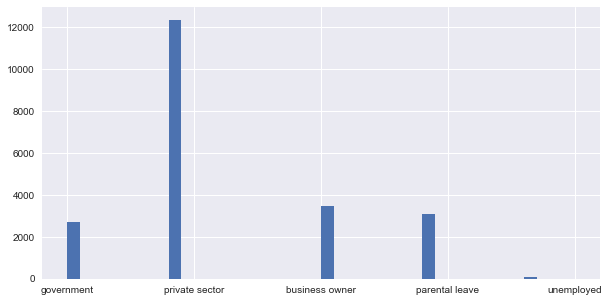

In [25]:
plt.subplots(figsize = (10,5))
plt.hist([remote_JS_LV['job_status']],
         width=0.1)

(array([ 2739.,     0., 12551.,     0.,     0.,  3084.,     0.,  3360.,
            0.,    93.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

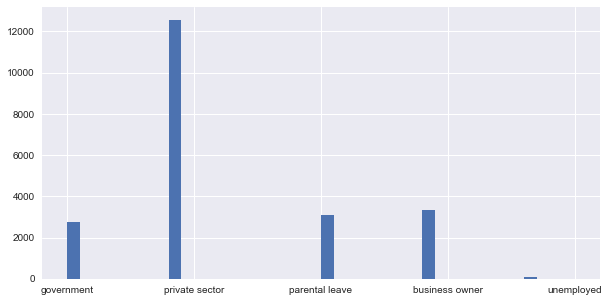

In [26]:
city_JS_LV = JS_LV[JS_LV['living']=='city'].dropna()
plt.subplots(figsize = (10,5))
plt.hist([city_JS_LV['job_status']],
         width=0.1)

In [27]:
print(len(JS_LV))

43590


In [28]:
data_total.insert(4,'job_status',JS_LV['job_status'])
data_total.insert(5,'living',JS_LV['living'])

In [29]:
data_total.keys()

Index(['id', 'sex and age', 'high_BP', 'heart_condition_detected_2017',
       'job_status', 'living', 'married', 'job_status and living_area',
       'average_blood_sugar', 'BMI', 'smoker_status', 'TreatmentA',
       'TreatmentB', 'TreatmentC', 'TreatmentD'],
      dtype='object')

In [30]:
data_total.head()

,id,sex and age,high_BP,heart_condition_detected_2017,job_status,living,married,job_status and living_area,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD
0,16053,"F, 61",1,0,government,remote,1,government?Remote,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN
1,1459,"F, 30",0,0,private sector,remote,0,Remote?private_sector,107.95,30.4,quit,NaN,NaN,NaN,NaN
2,7678,"F, 51",1,0,government,remote,1,government?Remote,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN
3,34943,"F, 54",0,0,government,city,1,government?City,113.98,57.3,quit,NaN,NaN,NaN,NaN
4,17741,"M, 27",0,0,private sector,city,0,private_sector?City,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN


In [31]:
del data_total['job_status and living_area']

In [32]:
data_total.head()

,id,sex and age,high_BP,heart_condition_detected_2017,job_status,living,married,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD
0,16053,"F, 61",1,0,government,remote,1,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN
1,1459,"F, 30",0,0,private sector,remote,0,107.95,30.4,quit,NaN,NaN,NaN,NaN
2,7678,"F, 51",1,0,government,remote,1,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN
3,34943,"F, 54",0,0,government,city,1,113.98,57.3,quit,NaN,NaN,NaN,NaN
4,17741,"M, 27",0,0,private sector,city,0,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN


In [36]:
age_dict_10 = {'sixty':60, 'eighty':80 ,'fifty':50, 'forty':40, 'twenty':20 ,'ninety':90,'thirty':30,'seventy':70}
age_dict_1 = {'one':1,'two':2,'three':3,'four':4,'five':5,'fivee':5,'six':6,'seven':7,'eight':8,'nine':9}
age_dict_ = {'thirteen':13,'fourteen':14,'fifteen':15,'sixteen':16,'seventeen':17,'eighteen':18,'nineteen':19,'eleven':11,'twelve':12}  
sex_list = ['m','M','MALE','f','F','FEMALE','other']

In [40]:
def process_age(x):
    pat = re.compile(r'[ -]')
    if type(x) == str:
        if not x:
            return np.nan
        x = x.strip()
        row = x.split(',')
        if not row[1] and not row[0]:
            return np.nan
        if not row[0] or not row[1]:
            if not row[1]:
                if row[0][0].isnumeric():
                    if '.' not in row[0]:
                        return int(row[0])
                    else:
                        return float(row[0])
                elif row[0] in sex_list:
                    return np.nan
                else:
                    for dic in [age_dict_,age_dict_1,age_dict_10]:
                        if row[0] in dic.keys():
                            return dic[row[0]]
                    return np.nan
            if not row[0]:
                if row[1][0].isnumeric():
                    if '.' not in row[1]:
                        return int(row[1])
                    else:
                        return float(row[1])
                elif row[1] in sex_list:
                    return np.nan
                else:
                    for dic in [age_dict_,age_dict_1,age_dict_10]:
                        if row[1] in dic.keys():
                            return dic[row[1]]
                    return np.nan
        sex,age = row[0],row[1].strip()
        if row[0][0].isnumeric()or (age in sex_list):
            sex,age = age,sex
        if age[0].isnumeric():
            if '.' not in age:
                return int(age)
            else:
                return float(age)
        age = re.split(pat,age)
        if len(age)==1:
            for dic in [age_dict_,age_dict_1,age_dict_10]:
                if age[0] in dic.keys():
                    return dic[age[0]]
        else:
            return age_dict_10[age[0]]+age_dict_1[age[1]]
    else:
        return np.nan
    
def process_sex(x):
    if type(x) == str:
        if not x:
            return np.nan
        x = x.strip()
        row = x.split(',')
        if not row[1] and not row[0]:
            return np.nan
        if not row[0] or not row[1]:
            if not row[1]:
                if row[0] not in sex_list:
                    return np.nan
            else:
                if row[1] not in sex_list:
                    return np.nan
        sex,age = row[0],row[1].strip()
        if sex[0].isnumeric() or (age in sex_list):
            sex,age = age,sex
        if sex in ['m','M','MALE']:
            return 1
        elif sex in ['F','FEMALE','f']:
            return 0
        else: return 2
    else:
        return np.nan

In [41]:
data_total['sex'] = data_total['sex and age'].apply(process_sex)
data_total['age'] = data_total['sex and age'].apply(process_age)

In [42]:
data_total

,id,sex and age,high_BP,heart_condition_detected_2017,job_status,living,married,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,sex,age
0,16053,"F, 61",1,0,government,remote,1,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN,0.0,61.00
1,1459,"F, 30",0,0,private sector,remote,0,107.95,30.4,quit,NaN,NaN,NaN,NaN,0.0,30.00
2,7678,"F, 51",1,0,government,remote,1,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN,0.0,51.00
3,34943,"F, 54",0,0,government,city,1,113.98,57.3,quit,NaN,NaN,NaN,NaN,0.0,54.00
4,17741,"M, 27",0,0,private sector,city,0,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN,1.0,27.00
5,26198,NaN,NaN,NaN,private sector,remote,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7284,"M, 63",0,0,private sector,city,1,100.85,37.5,non-smoker,NaN,NaN,NaN,NaN,1.0,63.00
7,10704,"M, 55",0,1,business owner,remote,1,188.39,NaN,NaN,0.0,0.0,0.0,0,1.0,55.00
8,41988,"F, 37",0,0,private sector,city,0,161.72,23.1,NaN,NaN,NaN,NaN,NaN,0.0,37.00
9,12578,"M, 49",0,0,private sector,city,1,91.02,30.4,active_smoker,NaN,NaN,NaN,NaN,1.0,49.00


In [43]:
del data_total['sex and age']

In [44]:
data_total.head()

,id,high_BP,heart_condition_detected_2017,job_status,living,married,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,sex,age
0,16053,1,0,government,remote,1,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN,0.0,61.0
1,1459,0,0,private sector,remote,0,107.95,30.4,quit,NaN,NaN,NaN,NaN,0.0,30.0
2,7678,1,0,government,remote,1,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN,0.0,51.0
3,34943,0,0,government,city,1,113.98,57.3,quit,NaN,NaN,NaN,NaN,0.0,54.0
4,17741,0,0,private sector,city,0,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN,1.0,27.0


In [45]:
data_total['sex'].value_counts()

0.0    25739
1.0    17780
2.0       24
Name: sex, dtype: int64

In [48]:
len(data_total['age'])

43590

In [85]:
data_new_train = data_total[:len(data_train)]
print(len(data_new_train))
data_new_test = data_total[len(data_train):]
print(len(data_new_test))

34872
8718


In [86]:
data_new_train.head()

,id,high_BP,heart_condition_detected_2017,job_status,living,married,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,sex,age
0,16053,1,0,government,remote,1,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN,0.0,61.0
1,1459,0,0,private sector,remote,0,107.95,30.4,quit,NaN,NaN,NaN,NaN,0.0,30.0
2,7678,1,0,government,remote,1,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN,0.0,51.0
3,34943,0,0,government,city,1,113.98,57.3,quit,NaN,NaN,NaN,NaN,0.0,54.0
4,17741,0,0,private sector,city,0,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN,1.0,27.0


In [87]:
target_train.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke_in_2018, dtype: object

In [88]:
data_new_train['stroke_in_2018'] = deepcopy(target_train)

/Library/Python/anaconda3/envs/MRC_QA/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
data_new_train
print(len(data_new_train))

34872


In [91]:
data_train_duplicate = data_new_train.drop_duplicates(keep='first')
data_test_duplicate = data_new_test.drop_duplicates(keep='first')

In [92]:
data_train_duplicate.to_csv('data_train.csv',index=False)
data_test_duplicate.to_csv('data_test.csv',index=False)

In [93]:
total_data = data_total.drop_duplicates(keep='first')

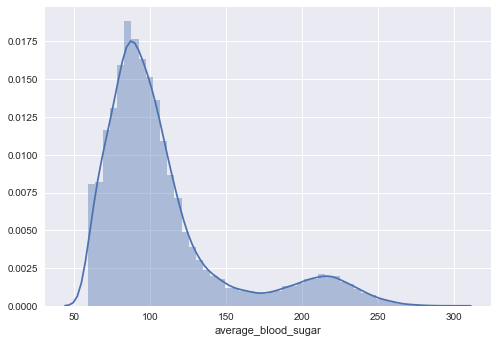

In [94]:
total_data[['average_blood_sugar', 'BMI']].describe()
sns.distplot(total_data['average_blood_sugar'].dropna())

#sns.distplot(data_original[['average_blood_sugar', 'stroke_in_2018']].dropna())
# new_stroke = data_original[['stroke_in_2018']].dropna().applymap(lambda x: int(x) if x.isdigit() and int(x) in [0,1] else None).dropna()
# new_blood_sugar = data_original.average_blood_sugar.fillna(df3['average_blood_sugar'].mean())
# bloodSugar_stroke = pd.concat([new_blood_sugar, new_stroke], axis=1)

In [110]:
average_blood_sugar = total_data['average_blood_sugar'].dropna()

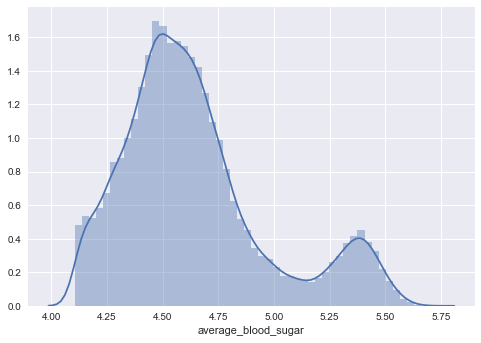

In [111]:
log_average_blood_sugar = np.log1p(average_blood_sugar)
sns.distplot(log_average_blood_sugar)


In [172]:
skew(log_average_blood_sugar)

0.9708092802511742

In [169]:
lam = -1.23
box_average_blood_sugar = boxcox1p(average_blood_sugar, lam)


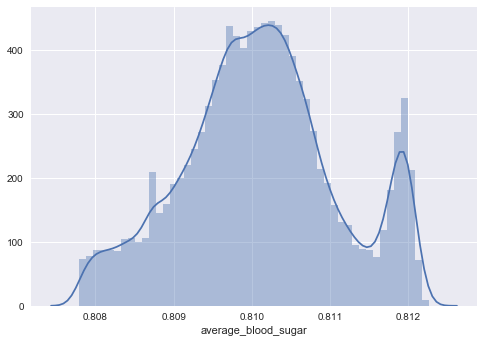

In [170]:
sns.distplot(box_average_blood_sugar)

In [171]:
skew(box_average_blood_sugar)

0.04834629549577553

In [173]:
data_train_duplicate

,id,high_BP,heart_condition_detected_2017,job_status,living,married,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,sex,age,stroke_in_2018
0,16053,1,0,government,remote,1,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN,0.0,61.0,0
1,1459,0,0,private sector,remote,0,107.95,30.4,quit,NaN,NaN,NaN,NaN,0.0,30.0,0
2,7678,1,0,government,remote,1,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN,0.0,51.0,0
3,34943,0,0,government,city,1,113.98,57.3,quit,NaN,NaN,NaN,NaN,0.0,54.0,0
4,17741,0,0,private sector,city,0,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN,1.0,27.0,0
5,26198,NaN,NaN,private sector,remote,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,7284,0,0,private sector,city,1,100.85,37.5,non-smoker,NaN,NaN,NaN,NaN,1.0,63.0,0
7,10704,0,1,business owner,remote,1,188.39,NaN,NaN,0.0,0.0,0.0,0,1.0,55.0,0
8,41988,0,0,private sector,city,0,161.72,23.1,NaN,NaN,NaN,NaN,NaN,0.0,37.0,0
9,12578,0,0,private sector,city,1,91.02,30.4,active_smoker,NaN,NaN,NaN,NaN,1.0,49.0,0


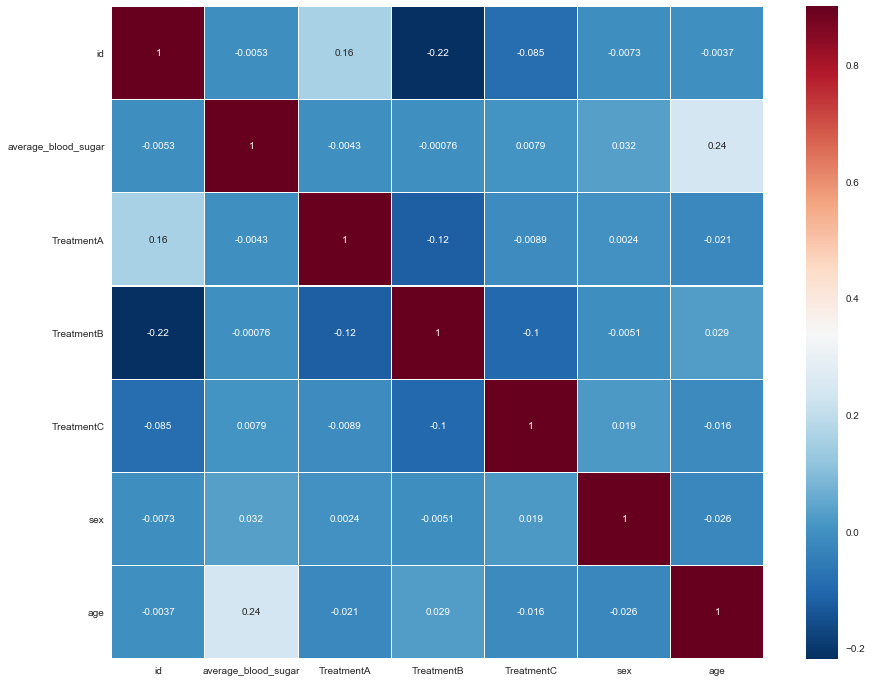

In [175]:
plt.subplots(figsize = (15,12))
sns.heatmap(data_train_duplicate.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)

In [176]:
heart = total_data['heart_condition_detected_2017']

In [178]:
heart.value_counts()

0      33104
0.0     8297
1       1652
1.0      416
n.a        1
N?A        1
.          1
Name: heart_condition_detected_2017, dtype: int64

In [179]:
high_BP = total_data['high_BP']

In [180]:
high_BP.value_counts()

0      31501
0.0     7895
1       3260
1.0      812
.,         1
Name: high_BP, dtype: int64

In [181]:
married = total_data['married']
married.value_counts()

1      22368
0      12424
1.0     5645
0.0     3071
11         1
.          1
Name: married, dtype: int64

In [183]:
smoker_status = total_data['smoker_status']
smoker_status.value_counts()

non-smoker       16090
quit              7509
active_smoker     6574
?                    9
.                    8
>                    4
_                    4
__                   2
N?A                  2
N?a                  1
quit?                1
??                   1
..                   1
,                    1
ï¿½ï¿½ï¿½¬           1
non>                 1
,,                   1
11                   1
>??                  1
Name: smoker_status, dtype: int64

In [184]:
treatA = total_data['TreatmentA']
treatA.value_counts()

0.0    1682
1.0     387
Name: TreatmentA, dtype: int64

In [185]:
treatB = total_data['TreatmentB']
treatB.value_counts()

0.0    1483
1.0     586
Name: TreatmentB, dtype: int64

In [186]:
treatC = total_data['TreatmentC']
treatC.value_counts()

0.0    1680
1.0     389
Name: TreatmentC, dtype: int64

In [187]:
treatD = total_data['TreatmentD']
treatD.value_counts()

0                1289
1                 364
0.0               334
1.0                82
0+E1860:E1868       1
Name: TreatmentD, dtype: int64